##  타이타닉 데이터 핸들링

#### 분석목표: 
함께탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
함께탑승수 (자녀,부모)는 생존에 영향을 주는 설명 변수일 것이다.


### step 0 : 패키지 불러오기

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### step 1 : 데이터 속성 및 기술통계량 확인 

In [15]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_df.dropna().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.140693,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,14.978458,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [17]:
titanic_df.var()

C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_10920\1482596901.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_df.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              169.066828
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### step 2: 목표변수 및 설명변수의 분포 확인

In [19]:
pd.crosstab([titanic_df.SibSp],titanic_df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


### step 3: 변수들의 결측 및 이상치 처리 

In [20]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic_df["Embarked"].fillna(method='ffill', inplace=True)
titanic_df["Cabin"].fillna(method='ffill', inplace=True)

In [41]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [48]:
titanic_df["Cabin"].fillna('', inplace=True)

In [49]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### step 4: 그래프 분석을 통해 변수간 관계를 확인 

c:\dev\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\dev\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\dev\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


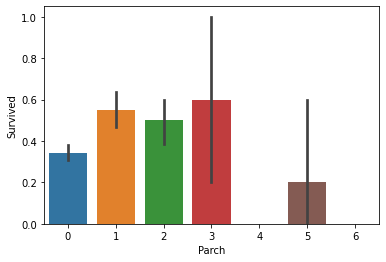

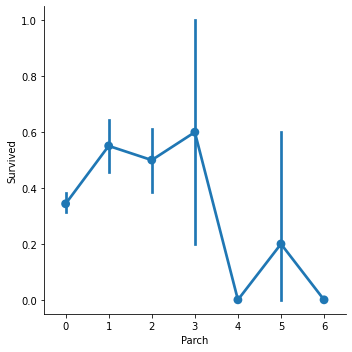

In [22]:
sns.barplot('Parch','Survived',data=titanic_df)
sns.factorplot('Parch','Survived',data=titanic_df)
# 부모와 자식이 3명이 있는 승객의 생존율이 가장 높은 것을 확인할 수 있습니다.

In [23]:
pd.crosstab(titanic_df.SibSp,titanic_df.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [25]:
# 부모와 자식이 있는 승객(Parch)에 대한 데이터 분석
pd.crosstab(titanic_df.Parch,titanic_df.Pclass)
# 부모와 자식이 없는 승객 중 3등급 객실에 승객수가 제일 많다는 것을 확인할 수 있고, 
# 부모와자식이 있는 승객 역시 3등급 객실에 많이 탄 것을 확인 할 수 있습니다.

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


c:\dev\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\dev\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\dev\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


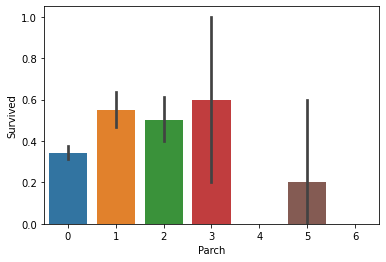

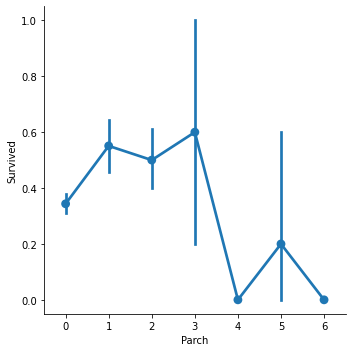

In [26]:
sns.barplot('Parch','Survived',data=titanic_df)
sns.factorplot('Parch','Survived',data=titanic_df)

### step 5: 생존에 영향을 미치는 잠재 인자 도출 

분석을 통해 함께탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수이다라는 결론을 도출 했습니다.
추가로 분석을 통해서 가족수가 1명인 1등급 객실이 제일 생존율이 높은 것을 알 수 있었고
부모와 자식이 3명이 있는 승객의 생존율이 가장 높은 것을 확인할 수 있었습니다.

## 실습 1

In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [4]:
ds_mycars =pd.read_csv("D:\data\mycars.csv")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [5]:
df = ds_mycars[['automatic','mpg']]
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [12]:
df = ds_mycars[['highway_mileage','mpg']]
df.groupby('highway_mileage').describe()

mpg                                                     
                count       mean       std   min    25%   50%    75%   max
highway_mileage                                                           
12                5.0   9.000000  0.000000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857143  0.899735  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161290  1.185939  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800000  1.032796  12.0  12.00  12.5  13.00  15.0
19               13.0  14.076923  0.862316  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000000  0.894427  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000000  0.000000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857143  0.899735  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000000  1.000000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692308  0.947331  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333333  1.676163  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000000  1.191367  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214286  1.188313  17.0  18.25  19.0  20.00  21.0
28                7.0  19.285714  0.755929  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636364  1.292670  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000000  1.414214  21.0  21.00  21.5  22.50  24.0
31                7.0  21.285714  0.951190  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000000  0.816497  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000000  2.828427  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000000       NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000000  0.000000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500000  0.707107  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000000       NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000000       NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000000  1.414214  33.0  33.50  34.0  34.50  35.0

## 실습 2

In [13]:
df = ds_mycars[['model','mpg']]
count = df['model'].value_counts().sort_index() 
count_data = pd.DataFrame({'Count': count}) 
count_data.columns.name = 'model' 
count_data 

model,Count
4runner 4wd,6
a4,7
a4 quattro,8
a6 quattro,3
altima,6
c1500 suburban 2wd,5
camry,7
camry solara,7
caravan 2wd,11
civic,9


In [14]:
df = ds_mycars[['automatic','mpg']]
count = df['automatic'].value_counts().sort_index() 
count_data = pd.DataFrame({'Count': count}) 
count_data.columns.name = 'automatic' 
count_data 

automatic,Count
auto,157
manual,77


## 실습 3

In [15]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [16]:
# 대한민국 남성의 20-30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm 이다. 
# 나의 키가 180cm일 경우에 나는 몇 % 범위에 위치할까요?

mu = 175
sigma = 5
x =180
prob = stats.norm.cdf(x,mu,sigma)
print("나의 키가 {0}cm일 경우에 나의 키는 {1:.1f}%".format(x,(1-prob)*100))

나의 키가 180cm일 경우에 나의 키는 15.9%


## 실습 4

In [17]:
# #1 1리터를 가지고 9km이상 15km이하를 달릴 확률은 얼마일까요?
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x,mu,sigma)
a = round(((prob-0.5)*2*100),1)
print("{0}km 이상 {1}km 이하를 달릴 확률은:{2:.1f}%".format(mu-(x-mu),mu+(x-mu),a))

9km 이상 15km 이하를 달릴 확률은:68.3%


In [18]:
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x, mu, sigma)
print("{0}km 이상 달릴 확률은:{1:.1f}%".format(x,(1-prob)*100))

15km 이상 달릴 확률은:15.9%


## 실습 5

In [19]:
t = 2.0
df = 100
prob = stats.t.cdf(t,df)
print("P(T <= t) : {:.3f}".format(prob))

P(T <= t) : 0.976


## 실습 6

In [20]:
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq,df)
print("P(X <= {0}) : {1:.4f}".format(chisq,prob))

P(X <= 3.0) : 0.0656


## 실습 7

In [21]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X <= F):{:.3f}".format(prob))

P(X <= F):0.850


## 실습 8

In [22]:
n = 5
for i in range(n+1) :
    prob = stats.binom.pmf( k = i, n=n, p=0.3)
    print("p(X = {0}) = {1:.3f}".format(i,prob))

p(X = 0) = 0.168
p(X = 1) = 0.360
p(X = 2) = 0.309
p(X = 3) = 0.132
p(X = 4) = 0.028
p(X = 5) = 0.002
